<a href="https://colab.research.google.com/github/Fatai-soliu/Image-Recognition-with-CNN/blob/main/Image_Recognition_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install tensorflow

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

## Data Preprocessing

In [3]:
#Import the dataset
#Link: https://www.kaggle.com/competitions/cifar-10

from tensorflow.keras.datasets import cifar10

In [4]:
# Loading the dataset

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [5]:
#Define variable for all the classes

class_name = ['0: airplane', '1: automobile', '2: bird', '3: cat', '4: deer', '5: dog', '6: frog', '7: horse', '8: ship', '9: truck']

In [6]:
print(class_name)

['0: airplane', '1: automobile', '2: bird', '3: cat', '4: deer', '5: dog', '6: frog', '7: horse', '8: ship', '9: truck']


In [7]:
x_train.max(), x_train.min(), x_train.mean()

(255, 0, 120.70756512369792)

In [8]:
y_train.max(), y_train.min(), y_train.mean()

(9, 0, 4.5)

In [9]:
# Normalizing images

x_train = x_train / 255.0
x_test = x_test / 255.0


In [10]:
#After Normalization, we can process the images faster as we have range from 1 to 0

x_train.max(), x_train.min(), x_train.mean()

(1.0, 0.0, 0.4733630004850874)

In [11]:
x_train.shape, x_test.shape

#50k images in x_train and 10k images in x_test and the shape of the image is 32 by 32 by 3

((50000, 32, 32, 3), (10000, 32, 32, 3))

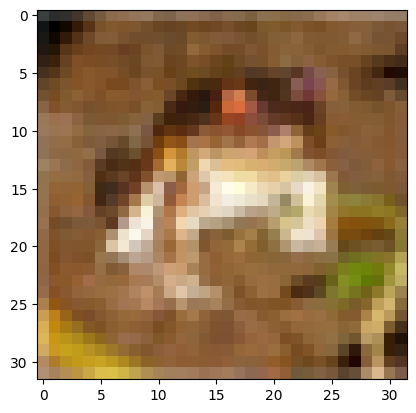

In [12]:
#Lets check one of the images

plt.imshow(x_train[0])

In [13]:
y_train[0]

#6 is a frog

array([6], dtype=uint8)

# Building the CNN

In [14]:
# Define the object

model = tf.keras.models.Sequential()

In [15]:
# Add first convolutional neural network layer
# 1. filters (kernal) = 32
# 2. kernal size = 3
# 3. padding = same
# 4. activation = ReLU
# 5. input shape = (32, 32, 3)

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size = 3, padding='same', activation='relu', input_shape = [32, 32, 3]))

In [16]:
#Add second CNN and maxpool layer (We don't have to specify the input shape)
# 1. filters (kernal) = 32
# 2. kernal size = 3
# 3. padding = same
# 4. activation = ReLU

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size = 3, padding='same', activation='relu'))

# maxpool layer parameters
# 1) pool size = 2
# 2) strides = 2
# 3) padding = valid

model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

In [17]:
# Adding third CNN layers
# 1. filters (kernal) = 64
# 2. kernal size = 3
# 3. padding = same
# 4. activation = ReLU
# 5. input shape = (32, 32, 3)

model.add(tf.keras.layers.Conv2D(filters=64, kernel_size = 3, padding='same', activation='relu'))

In [18]:
#Add fourth CNN and maxpool layer (We don't have to specify the input shape)
# 1. filters (kernal) = 64
# 2. kernal size = 3
# 3. padding = same
# 4. activation = ReLU
# 5. input shape = (32, 32, 3)

model.add(tf.keras.layers.Conv2D(filters=64, kernel_size = 3, padding='same', activation='relu'))

# maxpool layer parameters
# 1) pool size = 2
# 2) strides = 2
# 3) padding = valid

model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

In [19]:
# Add Dropout layer

model.add(tf.keras.layers.Dropout(0.4))  # Adding drop out layer is a regularization technique

In [20]:
# Add Flattening layer

model.add(tf.keras.layers.Flatten())

In [21]:
# Add first dense layer

model.add(tf.keras.layers.Dense(units=128, activation = 'relu'))

In [22]:
# Add second dense layer (output layer)

model.add(tf.keras.layers.Dense(units=10, activation = 'softmax'))

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                   

# Training the Model

In [24]:
# Compile the model

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['sparse_categorical_accuracy'])

In [25]:
# Train

model.fit(x_train, y_train, batch_size=10, epochs=10)

Epoch 1/10
5000/5000 [==============================] - 338s 66ms/step - loss: 1.4567 - sparse_categorical_accuracy: 0.4687
Epoch 2/10
5000/5000 [==============================] - 310s 62ms/step - loss: 1.0448 - sparse_categorical_accuracy: 0.6274
Epoch 3/10
5000/5000 [==============================] - 307s 61ms/step - loss: 0.9071 - sparse_categorical_accuracy: 0.6792
Epoch 4/10
5000/5000 [==============================] - 314s 63ms/step - loss: 0.8218 - sparse_categorical_accuracy: 0.7082
Epoch 5/10
5000/5000 [==============================] - 308s 62ms/step - loss: 0.7436 - sparse_categorical_accuracy: 0.7376
Epoch 6/10
5000/5000 [==============================] - 311s 62ms/step - loss: 0.6845 - sparse_categorical_accuracy: 0.7554
Epoch 7/10
5000/5000 [==============================] - 317s 63ms/step - loss: 0.6370 - sparse_categorical_accuracy: 0.7736
Epoch 8/10
5000/5000 [==============================] - 314s 63ms/step - loss: 0.6000 - sparse_categorical_accuracy: 0.7869
Epoch 9/

# Model Evaluation and prediction

In [26]:
# Evaluate the model performance

test_loss, test_acc = model.evaluate(x_test, y_test)

313/313 [==============================] - 14s 45ms/step - loss: 0.8091 - sparse_categorical_accuracy: 0.7392


In [27]:
print('Test Accuracy is: {}'.format(test_acc))

Test Accuract is: 0.7391999959945679


In [29]:
#Predictions

y_pred = np.argmax(model.predict(x_test), axis=1)

313/313 [==============================] - 17s 54ms/step


In [30]:
# Make individual predictions

print(y_pred[101]), print(y_test[101])

5
[5]


(None, None)

In [39]:
# Confusion matrix
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[790   9  37  13  13   4  15   8  65  46]
 [ 14 807   4   5   3   4   7   1  37 118]
 [ 72   5 547  51 100  67 109  20  15  14]
 [ 23  11  44 492  56 190 116  30  15  23]
 [ 16   1  50  52 709  23  84  46  15   4]
 [ 13   2  33 153  41 644  52  44   6  12]
 [  5   2  21  26  31  21 876   6   6   6]
 [ 14   3  18  35  60  57  10 781   4  18]
 [ 52  11   7   8   5   4   7   3 867  36]
 [ 24  40   1  10   4   5   9   6  22 879]]


In [40]:
#Add a custom colour - using matplotlib to create confusion matrix

cm_display = metrics.ConfusionMatrixDisplay( confusion_matrix = cm)

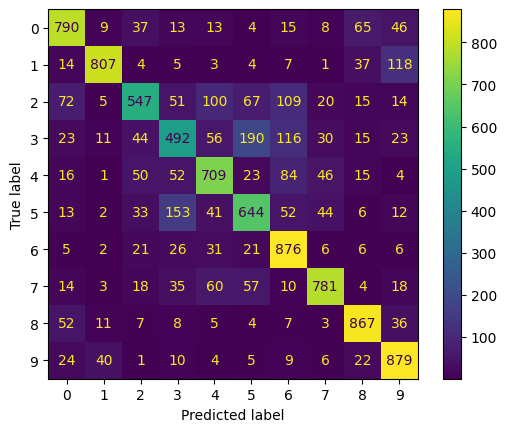

In [41]:
cm_display.plot()
plt.show()

In [32]:
acc_cm = accuracy_score( y_test, y_pred)
print(acc_cm)

0.7392
